In [1]:
import pandas as pd
import numpy as np

import math
import sys
import time
from matplotlib import pyplot as plt

# Pre-processing
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv("creditcard.csv")
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.groupby('Class').count()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,...,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315
1,492,492,492,492,492,492,492,492,492,492,...,492,492,492,492,492,492,492,492,492,492


### Preprocessing of data

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
#check is there any row having zeros in all features
sel = df.loc[df.eq(0).all(1)]
sel.count()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
#Print data dimension
df.shape

(284807, 31)

In [7]:
#Verify the dataset column datatypes
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

## Undersampling data

In [8]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

In [9]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [10]:
normal=normal.sample(n=492,random_state=142)

In [11]:
normal.shape

(492, 31)

In [12]:
sample_df = pd.concat([fraud, normal])

In [13]:
sample_df.shape

(984, 31)

## Apply MinMax Scaler

In [14]:
# Apply MinMax Scaler

X = sample_df.drop(['Class'], axis='columns')
scaler = preprocessing.MinMaxScaler()
X_data = X.values
X_scaled = scaler.fit_transform(X_data)
X = X_scaled
y = sample_df['Class'].values


### Anomaly Detection

In [15]:
detector_lof = LocalOutlierFactor(n_neighbors=2, novelty=True)

# Train the model (Compute the LOF scores)
detector_lof.fit(X)

# Obtain anomaly score 
y_score = detector_lof.decision_function(X)
print(y_score)

[ 1.10065090e-01  1.09818008e-01  4.79320572e-01  5.00000000e-01
 -1.64769330e-01  2.66630616e-01  5.31150578e-01  3.85327895e-01
  5.20058909e-01  4.54713438e-01  5.06237445e-01  2.55030832e-01
  4.53895303e-01  5.01305762e-01  5.00000000e-01  5.12439099e-01
  4.97013431e-01  5.06237445e-01  5.06237445e-01  5.01305762e-01
  5.01305762e-01  5.00000000e-01  5.12439099e-01  5.12439099e-01
  3.69603747e-01  5.90687601e-01  5.20058909e-01  5.33912687e-01
  5.90687601e-01  5.00000000e-01  5.00000000e-01  5.00000000e-01
  5.00000000e-01 -8.81616319e-02  5.33912687e-01  5.90687601e-01
  6.14184825e-01  6.14184825e-01  5.00000000e-01  5.11393701e-01
  5.11393701e-01  3.55852021e-01  6.14184825e-01  5.14833415e-01
 -1.81158827e+00  4.15321921e-01 -4.06148302e+00 -1.15977821e+00
  5.00000000e-01  5.00000000e-01  5.00000000e-01  5.00000000e-01
  5.00000000e-01  5.00000000e-01  5.00000000e-01  5.00000000e-01
  3.57088955e-01 -5.59563889e-01  5.00000000e-01  5.00000000e-01
  4.14229922e-01  4.81508

In [16]:
# Evaluate using AUC (Area Under Curve), the higher, the better
auc = roc_auc_score(y, y_score)
print('\n AUC score: %f\n' % auc)


 AUC score: 0.567431



In [17]:
# Predict the Yes/No label. 
y_pred = detector_lof.predict(X)
auc = roc_auc_score(y, y_pred)
print('\n AUC score: %f\n' % auc)


 AUC score: 0.494919



### Use iForest

In [18]:
# Create the iForest model
detector_if = IsolationForest()

# Train the model
detector_if.fit(X)

# Obtain anomaly score 
y_score = detector_if.decision_function(X)
print(y_score)

[ 0.12247713  0.08334934  0.09924009  0.06193889  0.03880248  0.05898996
  0.04202916  0.06803628  0.07131855  0.07801152  0.07947333  0.08332323
  0.10449752  0.11076161  0.06327371  0.02873588  0.040607    0.07414059
  0.08010648  0.09549907  0.09951666  0.04531145  0.04621564  0.04803568
 -0.01469611 -0.07643825  0.06345446 -0.03319561 -0.05788886  0.07439366
  0.07141183  0.06582097  0.02689218 -0.04065064 -0.02631273 -0.03649853
 -0.02978778 -0.03342652  0.03123594  0.12832429  0.12301194  0.11058542
 -0.03476476 -0.05348188 -0.0923784  -0.06768935 -0.06035277 -0.05979587
 -0.04846042 -0.05026374 -0.0486112  -0.05349107 -0.05165841 -0.05661786
 -0.06396476 -0.06587585  0.12683573  0.00360837  0.00255753  0.00531453
  0.13661748  0.00171236 -0.0036265  -0.00414999 -0.00361472 -0.01372128
 -0.01807007 -0.02429296 -0.03069687 -0.03725531 -0.03460575 -0.04044609
 -0.04090856  0.10668224 -0.05601762  0.07801116 -0.06135437 -0.0652222
 -0.08040936 -0.08898148 -0.09377332  0.05343029  0.

In [19]:
# Evaluate using AUC (Area Under Curve)
auc = roc_auc_score(y, y_score)
print('\n AUC score: %f\n' % auc)


 AUC score: 0.156339



In [20]:
# Predict the Yes/No label. 
y_pred = detector_if.predict(X)
print('\n AUC score: %f\n' % roc_auc_score(y, y_pred))


 AUC score: 0.395325



In [21]:
# Computer the auc values for different k
auc_scores = []
auc_scores_std = []
for i in range(1,50,5):
    auc_scores_tmp = []
    detector_lof = LocalOutlierFactor(n_neighbors=i, novelty=True)

    # Train the model (Compute the LOF scores)
    detector_lof.fit(X)

    # Obtain anomaly score 
    y_score = detector_lof.decision_function(X)
    print(y_score)

    # Computer the auc values for different k
    auc_scores_tmp.append(roc_auc_score(y, y_score))
    auc_scores.append(np.mean(auc_scores_tmp))
    auc_scores_std.append(np.std(auc_scores_tmp))

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.

[ 4.03224993e-01  6.08611728e-02  2.87137407e-01  4.01833772e-01
  1.10592142e-01  5.07976640e-01  5.05861370e-01  5.15703844e-01
  5.05861370e-01  4.72589508e-01  4.15421937e-01  3.77989087e-01
  4.56110674e-01  4.46916571e-01  4.94998035e-01  5.06004434e-01
  5.13071170e-01  4.85135534e-01  4.77482983e-01  4.97295122e-01
  4.97295122e-01  4.12220517e-01  5.12463702e-01  5.12463702e-01
 -7.08877353e-02  4.17366076e-01  5.05861370e-01  3.60973015e-01
  4.55312606e-01  4.65056399e-01  4.66370704e-01  4.48249514e-01
  4.57938262e-02  4.76350980e-01  3.68808150e-01  4.63928094e-01
  4.86874708e-01  4.88661148e-01  3.07013234e-02  4.54637955e-01
  4.73343187e-01  4.20123442e-01  4.98359988e-01  1.68086359e-01
 -6.85930291e-01  4.99945636e-01  4.85543817e-01  5.01092210e-01
  5.01092210e-01  5.01092210e-01  5.01092210e-01  5.01092210e-01
  5.01092210e-01  5.01092210e-01  5.01092210e-01  5.01092210e-01
  3.87440493e-01  1.02657796e-01  3.18278138e-01  3.66089031e-01
  4.54836922e-01  4.44575

[ 0.39143977  0.16326116  0.3294497   0.43009199  0.14823087  0.48841216
  0.46666382  0.4459938   0.48508514  0.3558807   0.35338564  0.37100156
  0.44732374  0.43894919  0.47971721  0.46561526  0.48112346  0.38841638
  0.41179918  0.43020054  0.43087475  0.44982782  0.48816437  0.48722871
 -0.01950909  0.27756944  0.44817807  0.38837044  0.31948707  0.47769214
  0.48541347  0.47689681  0.12796261  0.38266798  0.41023573  0.3377404
  0.42309447  0.42180878  0.10525391  0.37675935  0.39840455  0.36613705
  0.43565804  0.38710994 -0.36073327  0.43493624  0.36464681  0.43094646
  0.41932154  0.39532695  0.41182504  0.41458053  0.41147789  0.39997127
  0.38943265  0.38376795  0.36807561  0.48926001  0.49874886  0.50014573
  0.44407214  0.49567224  0.48995327  0.48995327  0.48995327  0.48995327
  0.48995327  0.48995327  0.48995327  0.48995327  0.48995327  0.48995327
  0.48995327  0.47424765  0.48995327  0.39699913  0.48995327  0.48916323
  0.48541617  0.47876431  0.47114075  0.27035883  0.

[ 3.99859025e-01  1.74509507e-01  3.45334489e-01  4.47478326e-01
  1.16210006e-01  3.66020218e-01  3.77283418e-01  4.13188762e-01
  3.99502447e-01  3.29269396e-01  3.52322897e-01  3.59001785e-01
  4.25486642e-01  4.47420893e-01  4.05365470e-01  3.45715001e-01
  3.72693565e-01  3.72558275e-01  3.78146394e-01  4.35613302e-01
  4.32957254e-01  4.65311896e-01  3.76918912e-01  3.70958433e-01
  4.14976844e-03  2.69959856e-01  3.66126809e-01  4.23953481e-01
  3.28633437e-01  3.92579272e-01  4.95359789e-01  4.92028149e-01
  1.88708609e-01  3.66919481e-01  4.41640233e-01  3.55475592e-01
  4.16694406e-01  4.13976259e-01  1.20549665e-01  3.41276558e-01
  3.43720628e-01  3.57707143e-01  4.04823879e-01  4.60375970e-01
 -1.92250563e-01  3.65895304e-01  3.82531656e-01  3.55130230e-01
  3.58492573e-01  3.57762510e-01  3.71020219e-01  3.74781681e-01
  3.84224683e-01  3.93728503e-01  4.01834371e-01  4.10984559e-01
  3.66977155e-01  3.90028206e-01  3.94670724e-01  3.83710781e-01
  4.27577900e-01  3.85819

[ 0.39567879  0.1954144   0.33746415  0.43979493  0.08180089  0.34932634
  0.33831299  0.36457756  0.34520843  0.33812532  0.3615723   0.36054788
  0.41790368  0.44396836  0.36360383  0.32226651  0.3602684   0.37272173
  0.38950648  0.43364998  0.43985719  0.4644582   0.35194375  0.35180935
  0.01269338  0.27380613  0.34076443  0.40745545  0.31972851  0.3446485
  0.49930241  0.49359907  0.19915501  0.38390111  0.43730479  0.34771282
  0.39595753  0.39674084  0.13839443  0.34568098  0.34637478  0.34536325
  0.40372769  0.47345903 -0.11461986  0.37935512  0.39704933  0.36685081
  0.34314241  0.34812145  0.35969014  0.36177814  0.36025476  0.37897727
  0.39724076  0.4114033   0.37070351  0.38444875  0.37243248  0.37715445
  0.42841777  0.36150732  0.36357772  0.35360959  0.34351912  0.33692262
  0.32649449  0.32592815  0.31420099  0.3100416   0.31369321  0.30946623
  0.29762543  0.4687247   0.27762621  0.40389446  0.26540731  0.2536461
  0.24049578  0.2270107   0.21151304  0.21151743  0.1

[ 0.38373833  0.20505688  0.3446619   0.43495528  0.05965693  0.32058315
  0.3105796   0.30846118  0.27527562  0.35063118  0.37409359  0.3785295
  0.41983392  0.44915277  0.29954585  0.29540307  0.32548787  0.38488982
  0.39591491  0.43977942  0.44319959  0.45910856  0.3399638   0.3303313
 -0.01026481  0.26686076  0.28558404  0.37628948  0.32126032  0.29987072
  0.48014228  0.48056549  0.17203203  0.38639133  0.40519951  0.34019389
  0.41726747  0.41922336  0.16797361  0.35015707  0.3426809   0.33602395
  0.41640226  0.47357364  0.0109067   0.41665068  0.44188273  0.39753436
  0.38550914  0.3850398   0.38934036  0.39050168  0.39212477  0.39257385
  0.39409068  0.4006596   0.37310669  0.4106952   0.38486934  0.38129181
  0.4332725   0.35940335  0.34671663  0.34418087  0.35101939  0.34690756
  0.3419913   0.35192143  0.33837044  0.32485475  0.31224697  0.31089193
  0.29566823  0.43554708  0.26400661  0.37282811  0.24815042  0.23494798
  0.21789649  0.20047477  0.18265883  0.16466403  0.0

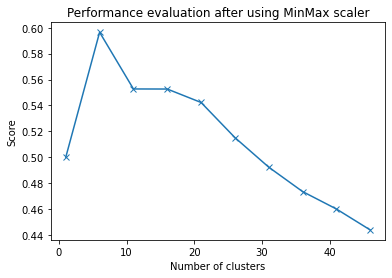

In [22]:
# Plot the relationship between auc and k
plt.plot(range(1,50,5), auc_scores, marker='x')
plt.title('Performance evaluation after using MinMax scaler')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()
             


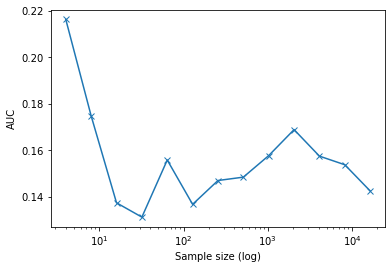

In [23]:
# Try different sample size ('max_samples' parameter) for iforest t0
# identify a good one. Plot the relationship for the size from 2**5
# to 2**14 with an exponential step 2**i.

auc_scores = []
sample_sizes = []
for i in range(2, 15):
 sample_sizes.append(2**i)
 detector_if = IsolationForest(max_samples=2**i)
 detector_if.fit(X)
 y_score = detector_if.decision_function(X)
 auc = roc_auc_score(y, y_score)
 auc_scores.append(auc)
    
# Plot the relationship between auc and sample size
plt.plot(sample_sizes, auc_scores, marker='x')
plt.xscale('log')
plt.xlabel('Sample size (log)')
plt.ylabel('AUC')
plt.show()

## Apply Standardization

In [24]:
# Apply standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X2 = sample_df.drop(['Class'], axis='columns')
X_data2 = X2.values

scaler.fit(X_data2)
X_scaled2 = scaler.transform(X_data2)

X2 = X_scaled2
y2 = sample_df['Class'].values


### Anomaly Detection 

In [25]:
detector_lof = LocalOutlierFactor(n_neighbors=2, novelty=True)

# Train the model (Compute the LOF scores)
detector_lof.fit(X2)

# Obtain anomaly score 
y_score2 = detector_lof.decision_function(X2)
print(y_score2)

[ 3.32398540e-01  3.31686440e-01  1.36156418e-01  5.00000000e-01
 -1.43736007e-01  4.43281894e-01  5.37180410e-01  3.62402154e-01
  5.17220662e-01  5.02830385e-01  5.12228321e-01  2.54205726e-01
  4.74786665e-01  5.00422935e-01  5.00000000e-01  5.28864088e-01
  4.89381742e-01  5.13317406e-01  5.13317406e-01  5.00422935e-01
  5.00422935e-01  5.00000000e-01  5.10621679e-01  5.10621679e-01
  5.08039863e-01  5.74987979e-01  5.17220662e-01  5.00000000e-01
  5.74987979e-01  5.00000000e-01  5.00000000e-01  5.00000000e-01
  5.00000000e-01 -1.43812522e-01  5.00000000e-01  5.74987979e-01
  6.22268082e-01  6.22268082e-01  5.00000000e-01  5.17977574e-01
  5.17977574e-01  4.88237346e-01  6.22268082e-01  3.40674630e-01
  3.04097125e-01  2.29999319e-01 -4.08593700e+00 -1.91880723e+00
  5.00141407e-01  5.00141407e-01  6.66889374e-01  4.99885626e-01
  4.99905487e-01  5.00060915e-01  6.66311005e-01  4.99894578e-01
  3.34296691e-01 -2.28457623e-01  5.00000000e-01  5.00000000e-01
  5.60418009e-01  4.21746

In [26]:
# Evaluate using AUC (Area Under Curve), the higher, the better
auc2 = roc_auc_score(y2, y_score2)
print('\n AUC score: %f\n' % auc)


 AUC score: 0.142429



In [27]:
# Predict the Yes/No label. 
y_pred2 = detector_lof.predict(X2)
auc2 = roc_auc_score(y2, y_pred2)
print('\n AUC score: %f\n' % auc2)


 AUC score: 0.487805



### Use iForest

In [28]:
# Create the iForest model
detector_if = IsolationForest()

# Train the model
detector_if.fit(X2)

# Obtain anomaly score 
y_score2 = detector_if.decision_function(X2)
print(y_score2)

[ 0.11300734  0.063995    0.08524214  0.05706041  0.01895386  0.05814859
  0.04419727  0.06497765  0.05792247  0.06232491  0.07425046  0.08019757
  0.10683909  0.10887     0.06331564  0.040114    0.05044424  0.06096914
  0.06003562  0.10222159  0.10216577  0.05176295  0.05995299  0.05935713
 -0.04350525 -0.0604432   0.06570811 -0.04726828 -0.05178348  0.06369489
  0.07164911  0.0547742   0.03586131 -0.04770007 -0.02947026 -0.04606325
 -0.03967005 -0.03980748  0.02550712  0.12233509  0.11840904  0.10665488
 -0.04002702 -0.04330251 -0.10941994 -0.05128376 -0.05164622 -0.04072067
 -0.03243926 -0.02970892 -0.02641931 -0.02576864 -0.02969624 -0.03129866
 -0.03325442 -0.03440732  0.11526348 -0.00803737  0.013861    0.01648521
  0.12010622  0.01391508  0.01851975  0.01590012  0.01212108  0.00766564
 -0.00082635  0.00213045 -0.00913536 -0.0127585  -0.01610615 -0.01800583
 -0.02516255  0.11150179 -0.03522294  0.08666505 -0.05021592 -0.0564287
 -0.06074268 -0.06483557 -0.06830821  0.03874198  0.

In [29]:
# Evaluate using AUC (Area Under Curve)
auc2 = roc_auc_score(y2, y_score2)
print('\n AUC score: %f\n' % auc2)


 AUC score: 0.149151



In [30]:
# Predict the Yes/No label. 
y_pred2 = detector_if.predict(X2)
print('\n AUC score: %f\n' % roc_auc_score(y2, y_pred2))


 AUC score: 0.395325



In [31]:
# Computer the auc values for different k
auc_scores2 = []
auc_scores_std2 = []
for i in range(1,50,5):
    auc_scores_tmp2 = []
    detector_lof = LocalOutlierFactor(n_neighbors=i, novelty=True)

    # Train the model (Compute the LOF scores)
    detector_lof.fit(X2)

    # Obtain anomaly score 
    y_score2 = detector_lof.decision_function(X2)
    print(y_score2)

    # Computer the auc values for different k
    auc_scores_tmp2.append(roc_auc_score(y2, y_score2))
    auc_scores2.append(np.mean(auc_scores_tmp2))
    auc_scores_std2.append(np.std(auc_scores_tmp2))

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.

[ 0.49139164 -0.07133857  0.2512579   0.40065207  0.21364432  0.50396183
  0.47493138  0.50816857  0.50774365  0.39534996  0.3801036   0.35034052
  0.40524805  0.43219067  0.39248213  0.49307133  0.50396183  0.42083969
  0.37657625  0.37964484  0.35834511  0.4010302   0.4885128   0.48733662
  0.00737048  0.39335543  0.48100005  0.4051251   0.39832604  0.41454971
  0.45640976  0.45072882  0.06963942  0.44905929  0.42502766  0.3924145
  0.4458074   0.44281308  0.14833192  0.42913775  0.44013325  0.39298186
  0.4401464   0.18165897 -1.28388116  0.44194004  0.48972604  0.45304333
  0.49907863  0.49907863  0.49907863  0.49907863  0.49907863  0.49907863
  0.49907863  0.49907863  0.44687816  0.1697447   0.32644019  0.37459608
  0.50333518  0.430873    0.47411623  0.48678014  0.48678014  0.52584227
  0.56224709  0.58415996  0.58415996  0.58905572  0.55914946  0.52522458
  0.48925065  0.3785289   0.45017439  0.143428    0.43984042  0.41630456
  0.38070284  0.33303315  0.2732932   0.3204831   0.

[ 0.47940564 -0.06993851  0.23127967  0.41315632  0.17689239  0.44950257
  0.42786553  0.49000062  0.44400597  0.34576772  0.34710833  0.28511201
  0.43482759  0.41634285  0.40760246  0.43195153  0.42929056  0.38630433
  0.39019039  0.4057033   0.41118212  0.4120807   0.46348175  0.46443405
 -0.10981341  0.3285588   0.41008219  0.37757609  0.33694757  0.413277
  0.47028797  0.46665989 -0.01822249  0.40301106  0.4247861   0.32142189
  0.3945339   0.39060091  0.08361864  0.40883626  0.4162298   0.36121656
  0.37648851  0.19445155 -1.5666846   0.30936504  0.30309088  0.37490132
  0.37370987  0.37145991  0.36856249  0.34451266  0.34921911  0.34482814
  0.33985976  0.33426988  0.43101271  0.39258108  0.44738888  0.46409511
  0.48748676  0.50963118  0.52679639  0.52679639  0.52679639  0.52679639
  0.54012993  0.54012993  0.54235726  0.54238354  0.53525833  0.52039465
  0.52039465  0.41099354  0.52039465  0.11553674  0.52039465  0.50445988
  0.47790232  0.44603136  0.4088467   0.31820364  0.2

[ 0.45900685 -0.05673179  0.25756525  0.39730085  0.12164597  0.433771
  0.38849943  0.45104732  0.42901536  0.30816642  0.31695503  0.25734241
  0.43825289  0.4230526   0.40090083  0.39100811  0.40284434  0.3422782
  0.34841911  0.42832471  0.43054305  0.40009543  0.43522159  0.43517413
 -0.2848628   0.29847843  0.39656871  0.4047827   0.30916009  0.3948079
  0.46511835  0.4742686  -0.02616297  0.38225871  0.44047688  0.29506895
  0.38752465  0.38520835  0.05841597  0.40803397  0.40334814  0.3760359
  0.38243329  0.26623409 -1.56176615  0.30898933  0.2484499   0.35044655
  0.31225404  0.30875719  0.30425652  0.29869632  0.29224207  0.28473639
  0.27636633  0.26707072  0.42427198  0.50515762  0.518664    0.51604095
  0.48318487  0.50480876  0.49618367  0.48527768  0.48527768  0.48527768
  0.48527768  0.48527768  0.48527768  0.48527768  0.48527768  0.48527768
  0.48527768  0.40380719  0.48527768  0.1395113   0.48527768  0.48216834
  0.47548552  0.46877932  0.45978832  0.28646655  0.2263

[ 4.05645610e-01 -5.22974606e-02  2.73559729e-01  3.69887858e-01
  9.14290419e-02  4.09638667e-01  3.71322762e-01  4.18882985e-01
  4.13184054e-01  2.94422228e-01  3.03578063e-01  2.15348587e-01
  4.43495465e-01  4.36159846e-01  3.81862881e-01  3.76755591e-01
  4.00751737e-01  3.25518860e-01  3.34666069e-01  4.30312094e-01
  4.33538970e-01  4.08927734e-01  4.21535939e-01  4.21720287e-01
 -3.16866786e-01  2.72686428e-01  4.00263092e-01  4.03838012e-01
  2.92881615e-01  3.91883486e-01  4.67557815e-01  4.76411415e-01
  1.45132122e-02  3.85934867e-01  4.35232907e-01  2.91567194e-01
  3.88711132e-01  3.88127444e-01  2.50846743e-04  4.00795863e-01
  3.83418311e-01  3.64398444e-01  3.90452169e-01  3.15293933e-01
 -1.58664653e+00  2.82181791e-01  2.51059291e-01  3.20328465e-01
  2.79915273e-01  2.74813992e-01  2.79473508e-01  2.72470658e-01
  2.64400631e-01  2.48104696e-01  2.39899747e-01  2.30554914e-01
  4.23229928e-01  4.10330704e-01  4.32160500e-01  4.29044543e-01
  4.74666336e-01  4.28347

[ 0.37591252 -0.04232995  0.27419643  0.35624208  0.07935776  0.39354639
  0.36872142  0.40967116  0.40244015  0.315985    0.287511    0.20227817
  0.44845218  0.44671119  0.38858659  0.36069669  0.38309506  0.31624757
  0.3206656   0.43618981  0.44236239  0.40791988  0.40943853  0.40964072
 -0.37084305  0.240271    0.39205199  0.38684332  0.28216844  0.38445858
  0.46194371  0.46863329 -0.02771271  0.37631938  0.40851248  0.30623491
  0.40893857  0.40626249 -0.07711122  0.39859489  0.37955652  0.35195706
  0.39390871  0.35981603 -1.63051916  0.27216121  0.25723298  0.29821458
  0.26243636  0.25705689  0.25362692  0.2596599   0.25149613  0.2577089
  0.25439527  0.26258213  0.42267485  0.35936767  0.38374248  0.38562185
  0.46481753  0.37423979  0.36608581  0.35881912  0.35038972  0.34177052
  0.33211334  0.32210786  0.31178452  0.3049881   0.29457959  0.28391153
  0.27300441  0.38334639  0.25197076  0.16736961  0.24280849  0.23141045
  0.21984144  0.20811403  0.19553028  0.27740425  0.

[ 0.38436191 -0.04343396  0.26180647  0.35011486  0.05302212  0.39578332
  0.36000354  0.38777008  0.39102727  0.31642538  0.27637188  0.20930884
  0.45651695  0.44861769  0.38562297  0.34982813  0.36608486  0.31391908
  0.32444594  0.44977404  0.45483426  0.39261544  0.40236467  0.39496015
 -0.42371172  0.23311945  0.37762661  0.37893548  0.28836065  0.37198004
  0.45542751  0.45897054 -0.06186732  0.37224727  0.41033387  0.29652963
  0.39162867  0.39199387 -0.12948397  0.40132357  0.3809521   0.35238555
  0.39218104  0.37457993 -1.58582701  0.24130392  0.28108489  0.28145985
  0.25513348  0.25098174  0.24439398  0.24679745  0.25157974  0.25053885
  0.25884141  0.27341594  0.42729376  0.36557791  0.38976791  0.38176185
  0.46119059  0.36375776  0.35372308  0.34270526  0.33102725  0.31842426
  0.30714734  0.29808306  0.28496189  0.27426896  0.26075332  0.24691432
  0.24773068  0.37862172  0.21936738  0.13214309  0.20507449  0.19264948
  0.17792805  0.16300413  0.14789168  0.27843366  0

[ 3.90354245e-01 -2.39583315e-02  2.49521870e-01  3.34340013e-01
  3.82110688e-02  3.74791195e-01  3.58471828e-01  3.82323206e-01
  3.89349250e-01  3.08551757e-01  2.77239988e-01  2.10213229e-01
  4.56360023e-01  4.48904285e-01  3.90025971e-01  3.38238667e-01
  3.66526914e-01  3.17593288e-01  3.28472311e-01  4.58378664e-01
  4.67865416e-01  3.83984066e-01  3.84181174e-01  3.86000874e-01
 -4.70728475e-01  2.25293604e-01  3.67914511e-01  3.67842180e-01
  2.84531654e-01  3.66125408e-01  4.45859195e-01  4.49127889e-01
 -6.86079428e-02  3.62292015e-01  4.10686605e-01  3.16215741e-01
  3.75713631e-01  3.75013689e-01 -1.60322972e-01  4.03724432e-01
  3.73573380e-01  3.54794629e-01  3.96529736e-01  3.97364828e-01
 -1.52456926e+00  2.44010463e-01  2.76832768e-01  2.94763601e-01
  2.79219902e-01  2.74173273e-01  2.71594679e-01  2.64511108e-01
  2.59427335e-01  2.61970054e-01  2.71966265e-01  2.78129429e-01
  4.25574211e-01  3.75724328e-01  3.85969011e-01  3.75567423e-01
  4.61065746e-01  3.43916

[ 3.91027330e-01 -1.31326185e-02  2.58560416e-01  3.37967627e-01
  6.66094674e-02  3.75130540e-01  3.60724866e-01  3.57663715e-01
  3.68411236e-01  3.04472154e-01  2.80687348e-01  2.06144568e-01
  4.56675211e-01  4.54002288e-01  3.86059302e-01  3.36379147e-01
  3.64812894e-01  3.23616882e-01  3.30634031e-01  4.68401434e-01
  4.71101972e-01  3.86840811e-01  3.73570252e-01  3.76014655e-01
 -4.90212875e-01  2.20975695e-01  3.43233225e-01  3.65380713e-01
  2.88992524e-01  3.56122223e-01  4.32054475e-01  4.32970840e-01
 -8.21647791e-02  3.56578594e-01  3.92163924e-01  3.06612405e-01
  3.70437571e-01  3.69706361e-01 -1.48707549e-01  4.04413350e-01
  3.67842542e-01  3.53785407e-01  3.85993031e-01  3.76076978e-01
 -1.49771347e+00  2.54126916e-01  2.81536633e-01  2.99432275e-01
  2.86487951e-01  2.91805361e-01  2.86125096e-01  2.83633025e-01
  2.83014821e-01  2.76126165e-01  2.79139358e-01  2.84669750e-01
  4.29841773e-01  3.72612287e-01  3.72038803e-01  3.58183947e-01
  4.61502283e-01  3.37243

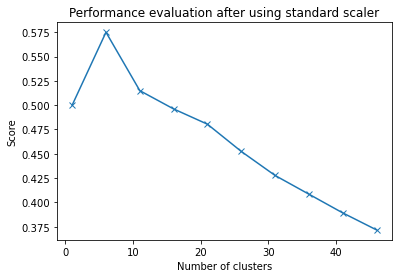

In [32]:
# Plot the relationship between auc and k
plt.plot(range(1,50,5), auc_scores2, marker='x')
plt.title('Performance evaluation after using standard scaler')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()

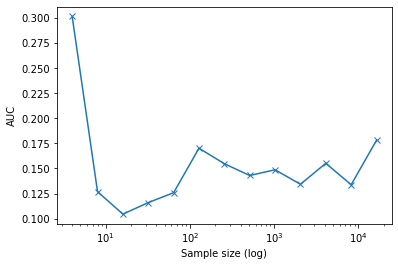

In [33]:
# Try different sample size ('max_samples' parameter) for iforest t0
# identify a good one. Plot the relationship for the size from 2**5
# to 2**14 with an exponential step 2**i.

auc_scores2 = []
sample_sizes2 = []
for i in range(2, 15):
 sample_sizes2.append(2**i)
 detector_if = IsolationForest(max_samples=2**i)
 detector_if.fit(X2)
 y_score2 = detector_if.decision_function(X2)
 auc2 = roc_auc_score(y2, y_score2)
 auc_scores2.append(auc2)
    
# Plot the relationship between auc and sample size
plt.plot(sample_sizes2, auc_scores2, marker='x')
plt.xscale('log')
plt.xlabel('Sample size (log)')
plt.ylabel('AUC')
plt.show()

## Use LSHiForest Framework

In [34]:
from detectors import LSHiForest

In [35]:
# Create the LSHiForest model
detector_LSHif = LSHiForest()

# Train the model
detector_LSHif.fit(X)

# Obtain anomaly score 
y_score = detector_LSHif.decision_function(X)
print(y_score)

[-0.21758551 -0.22765763 -0.22103961 -0.26174809 -0.29833039 -0.27679424
 -0.28006059 -0.27232453 -0.26801089 -0.24565725 -0.24264585 -0.24904088
 -0.23452261 -0.23139255 -0.28606945 -0.28231847 -0.28523086 -0.24193642
 -0.24404914 -0.22058223 -0.22436042 -0.25159535 -0.26298434 -0.26162517
 -0.33918602 -0.348547   -0.27329493 -0.32012611 -0.32673099 -0.26721281
 -0.24775357 -0.24474588 -0.27431618 -0.29689968 -0.32063276 -0.3276207
 -0.28241077 -0.28227523 -0.27656182 -0.20022254 -0.21955478 -0.20629891
 -0.28917542 -0.32098767 -0.47233836 -0.32793103 -0.354657   -0.29900479
 -0.27275716 -0.26652816 -0.27490641 -0.26699427 -0.25866873 -0.27026875
 -0.27538414 -0.2824924  -0.21042792 -0.30615283 -0.26895964 -0.26809596
 -0.20143891 -0.26044017 -0.25523548 -0.26076547 -0.25341124 -0.25661976
 -0.24306916 -0.24844626 -0.25518245 -0.25626249 -0.25689708 -0.26061995
 -0.2648167  -0.22341604 -0.27304987 -0.21073089 -0.2779242  -0.28700684
 -0.30507182 -0.31581213 -0.32225971 -0.27039399 -0.

In [36]:
# Evaluate using AUC (Area Under Curve)
auc = roc_auc_score(y, y_score)
print('\n AUC score: %f\n' % auc)


 AUC score: 0.188743



In [37]:
#Initiate different LSHiforest intances
num_ensemblers=100
ground_truth = y

classifiers = [("sklearn.ISO", IsolationForest(num_ensemblers)), ("ALSH", LSHiForest('ALSH', num_ensemblers)), ("L1SH", LSHiForest('L1SH', num_ensemblers)), ("L2SH", LSHiForest('L2SH', num_ensemblers))]


In [38]:
#Calculate accuracy and time for the different instances of LSHiForest

for i, (clf_name, clf) in enumerate(classifiers):

    print("\n"+clf_name+":")
    start_time = time.time()
    
    clf.fit(X)
    
    train_time = time.time()-start_time
    
    y_pred = clf.decision_function(X)
    
    test_time = time.time()-start_time-train_time
    
    auc = roc_auc_score(ground_truth, y_pred)
    
    print("\tAUC score:\t", auc)
    print("\tTraining time:\t", train_time) 
    print("\tTesting time:\t", test_time)


sklearn.ISO:
	AUC score:	 0.15062545442527597
	Training time:	 0.381028413772583
	Testing time:	 0.12300968170166016

ALSH:
	AUC score:	 0.20642474717430098
	Training time:	 5.900527477264404
	Testing time:	 6.769546031951904

L1SH:
	AUC score:	 0.14516408883601034
	Training time:	 6.789103269577026
	Testing time:	 8.076221466064453

L2SH:
	AUC score:	 0.17338802961200345
	Training time:	 10.410685777664185
	Testing time:	 17.4716899394989


## Supervised Classification Model

In [39]:
#Import modules

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [40]:
#Create objects

KNN = KNeighborsClassifier(n_neighbors=5)
clf = DecisionTreeClassifier(random_state=0)

In [41]:
#Train test split data

from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.20)

### Use KNeighbors Classifier

In [42]:
#Train and predict a KNN classifier

KNN.fit(X_tr, y_tr)
y_pred = KNN.predict(X_te)

In [43]:
#Apply Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_te, y_pred))
print(classification_report(y_te, y_pred))

[[90  0]
 [14 93]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        90
           1       1.00      0.87      0.93       107

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



In [44]:
#Calculate testing accuracy

print ("Accuracy:", KNN.score(X_te, y_te))

Accuracy: 0.9289340101522843


In [45]:
# Calculating error for a range of K

error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_tr, y_tr)
    pred_i = knn.predict(X_te)
    error.append(np.mean(pred_i != y_te))

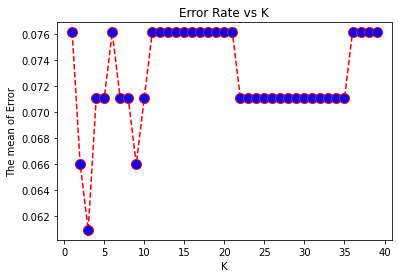

In [46]:
# Plot Error Rate vs K

plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('The mean of Error')
plt.show()

### Apply Different n_neighbors value (range from 1 to 11)

In [47]:
#Execute KNN classifier for different n_neighbors values (range from 1 to 11)
# use k-fold cross-validation (10-fold cross validation)

from sklearn.model_selection import cross_val_score
n_values = range(1, 11)
for n in n_values:
    KNN = KNeighborsClassifier(n_neighbors = n)
    scores = cross_val_score(KNN, X, y, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))


Accuracy: 0.90 (+/- 0.03)
Accuracy: 0.92 (+/- 0.05)
Accuracy: 0.92 (+/- 0.04)
Accuracy: 0.92 (+/- 0.04)
Accuracy: 0.92 (+/- 0.04)
Accuracy: 0.92 (+/- 0.04)
Accuracy: 0.93 (+/- 0.04)
Accuracy: 0.92 (+/- 0.04)
Accuracy: 0.92 (+/- 0.04)
Accuracy: 0.92 (+/- 0.05)


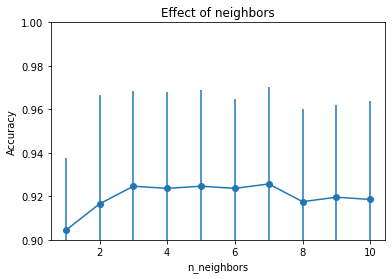

In [48]:
# visualize

import matplotlib.pyplot as plt
accuracy_scores = list()
accuracy_scores_std = list()
for n in n_values:
    KNN = KNeighborsClassifier(n_neighbors = n)
    scores = cross_val_score(KNN, X, y, cv=10, scoring='accuracy')
    accuracy_scores.append(scores.mean())
    accuracy_scores_std.append(scores.std())
    
plt.errorbar(n_values, accuracy_scores, yerr=accuracy_scores_std, marker='o')
plt.title('Effect of neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)
plt.show()

In [49]:
# Use grid search to faciliate the identification of the best hyperparameter

from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'n_neighbors': range(2, 11)}]
search = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='accuracy', cv=10)
search.fit(X_tr, y_tr)

print("Best parameters set found on training set:")
print(search.best_params_)

Best parameters set found on training set:
{'n_neighbors': 7}


### Use Decision Tree Classifier

In [50]:
#Train classifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_tr, y_tr)

DecisionTreeClassifier(random_state=0)

In [51]:
#Predict 
y_pred = clf.predict(X_te)

In [52]:
#Confusion Matrix

print(confusion_matrix(y_te, y_pred))
print(classification_report(y_te, y_pred))

[[84  6]
 [ 9 98]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        90
           1       0.94      0.92      0.93       107

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



In [53]:
#Calculate testing accuracy
print ("Accuracy:", clf.score(X_te, y_te))

Accuracy: 0.9238578680203046


### Hyper Tunning

In [54]:
# Tuning the model hypberparameter "max_depth"
clf2 = DecisionTreeClassifier(criterion="entropy", max_depth=2)
clf2.fit(X_tr, y_tr)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [55]:
#Predict
y_pred = clf.predict(X_te)

In [56]:
# Performance metrics
print(confusion_matrix(y_te, y_pred))
print(classification_report(y_te, y_pred))

[[84  6]
 [ 9 98]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        90
           1       0.94      0.92      0.93       107

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



In [57]:
#Accuracy
print ("Accuracy:", clf.score(X_te, y_te))

Accuracy: 0.9238578680203046
